In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from random import randint

In [66]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import callbacks

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
def h_v(image):
    steps = 1
    cutoff = 220
    h,w,d = image.shape
    for i in range(w):
        if(np.mean(image[i:i+1,:,:]) < cutoff):
            image[i:i+1,:,:].fill(255)
    for i in range(h):
        if(np.mean(image[:,i:i+1,:]) < cutoff):
            image[:,i:i+1,:].fill(255)
    return(image)

### baseline model using mulit-layer perceptron

In [78]:
path = 'create-train-data/'
filelist = os.listdir(path)
filelist.sort()
cnt = 0
for f in filelist[:]:
    if (f.endswith(".png")):
        foo = cv2.imread(path+f)
        
#         removing horizontal and vertical grids
        foo = h_v(foo)
        
#         making both height and width of the same dimension which is 9 * 28
        foo = cv2.resize(foo, (252,252), interpolation = cv2.INTER_LINEAR)
        foo = cv2.cvtColor(foo,cv2.COLOR_BGR2GRAY)
        foo = cv2.threshold(foo, 170, 255, cv2.THRESH_BINARY_INV)[1]
#         plt.imshow(foo)
#         plt.show()
        
#         store train data
        h,w = foo.shape
        box = 28
        for i in range(0,h,box):
            for j in range(0,w,box):
                foo_r = foo[i:i+box:, j:j+box]
#                 plt.imshow(foo_r)
#                 plt.show()

                foo_f = foo_r.reshape(1, 784).astype('float32')
                foo_f = foo_f/255
                if((i==0) & (j==0)):
                    train = foo_f.copy()
                else:
                    train = np.append(train, foo_f, axis = 0)
        if cnt == 0: train_x = train.copy()
        else: train_x = np.append(train_x, train, axis = 0)
        cnt = cnt + 1

In [6]:
# train_f = train_f[0:162]

In [79]:
train_x.shape

(810, 784)

In [80]:
train_y0 = np.array([0,0,0,6,9,0,4,0,0
                 ,0,2,9,0,0,5,0,0,3
                 ,0,0,1,0,3,4,0,0,8
                 ,9,8,0,0,0,1,0,7,0
                 ,2,0,7,0,6,9,0,3,1
                 ,0,0,3,2,0,7,5,4,0
                 ,8,3,0,9,0,0,0,0,7
                 ,0,0,5,0,2,0,0,0,0
                 ,1,0,6,5,7,3,0,0,4
                 ,6,0,0,1,0,0,0,0,2
                 ,8,0,1,0,9,0,0,0,0
                 ,0,7,5,0,8,4,0,0,0
                 ,4,3,0,0,2,0,5,6,1
                 ,5,1,8,7,0,0,4,0,9
                 ,0,9,6,4,1,0,3,0,0
                 ,0,0,0,0,7,0,0,0,0
                 ,0,6,0,0,3,1,0,5,0
                 ,7,0,2,5,4,0,6,0,3
                 ,0,9,1,0,5,0,6,8,0
                 ,0,0,0,6,8,7,0,0,5
                 ,8,0,0,0,1,3,0,2,0
                 ,4,0,0,0,0,2,0,0,0
                 ,0,0,2,0,0,8,7,6,0
                 ,0,8,6,4,0,0,1,0,0
                 ,3,0,4,8,0,0,2,5,0
                 ,1,5,8,0,0,0,3,4,0
                 ,0,2,9,0,0,5,0,7,1
                 ,4,0,6,7,5,1,0,8,0
                 ,2,0,8,0,0,0,4,7,0
                 ,0,0,0,0,0,0,9,0,6
                 ,5,3,0,2,0,0,0,0,0
                 ,6,4,9,1,3,0,0,0,0
                 ,0,0,7,9,0,5,1,0,0
                 ,0,7,0,8,2,9,0,5,0
                 ,0,6,2,0,1,0,0,3,8
                 ,1,8,0,0,0,7,0,0,9
                 ,7,0,4,5,3,0,2,0,0
                 ,0,0,8,1,6,0,0,0,0
                 ,1,0,2,0,0,0,6,8,5
                 ,0,0,7,9,1,0,0,6,8
                 ,0,0,5,0,0,7,3,0,2
                 ,6,8,0,0,5,4,1,9,0
                 ,0,0,0,7,0,0,8,0,0
                 ,2,5,0,0,0,0,4,7,3
                 ,0,0,0,0,4,0,0,2,6
                 ,7,4,5,0,9,0,0,0,0
                 ,0,3,2,1,5,0,0,4,6
                 ,0,0,0,2,8,0,5,0,3
                 ,2,0,0,0,0,0,0,6,0
                 ,9,8,0,6,0,0,3,5,1
                 ,0,0,0,5,4,0,2,0,7
                 ,3,0,8,0,0,0,0,0,2
                 ,0,2,0,7,6,0,0,1,0
                 ,0,6,0,9,0,8,0,3,4
                 ,3,1,5,6,0,0,0,0,4
                 ,0,9,0,0,0,0,2,0,0
                 ,2,0,0,5,9,0,0,1,3
                 ,0,6,0,1,7,5,0,0,0
                 ,1,8,0,3,0,0,7,0,0
                 ,5,3,0,0,4,0,0,9,6
                 ,0,2,9,0,5,1,0,7,8
                 ,0,0,0,0,3,0,0,2,0
                 ,7,4,3,0,0,2,5,0,0
                 ,0,0,0,7,0,0,0,0,0
                 ,7,2,0,0,0,9,0,5,1
                 ,8,9,1,0,2,6,0,7,0
                 ,9,0,3,2,0,0,0,6,8
                 ,6,8,0,1,0,0,3,4,2
                 ,2,5,4,0,0,0,0,0,0
                 ,0,0,9,3,1,0,6,8,0
                 ,0,0,0,9,5,0,0,0,4
                 ,0,3,0,6,7,0,0,1,0
                 ,6,9,0,0,0,0,7,0,0
                 ,0,0,0,0,9,6,0,0,0
                 ,0,8,0,7,5,3,0,9,0
                 ,0,2,0,3,7,4,5,6,1
                 ,3,6,0,0,0,5,0,2,0
                 ,0,0,0,9,6,0,3,7,8
                 ,0,0,6,0,3,1,0,8,4
                 ,0,4,5,8,0,7,6,0,0
                 ,0,0,0,0,0,0,0,5,7
                 ,0,0,0,4,0,9,8,0,2
                 ,5,7,0,3,8,0,0,0,4
                 ,0,0,0,0,0,2,5,0,0
                 ,3,2,8,0,1,7,0,6,0
                 ,0,5,7,9,3,0,0,0,0
                 ,9,0,0,0,2,0,7,3,0
                 ,7,8,0,1,0,0,0,0,0
                 ,6,0,5,2,0,8,0,0,7
                 ,0,9,4,0,7,3,0,5,0])

In [81]:
train_y = np_utils.to_categorical(train_y0)

In [82]:
train_y.shape

(810, 10)

In [83]:
num_pixels = 784

In [84]:
num_classes = train_y.shape[1]

In [85]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(250, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [86]:
len_trn = 600

In [87]:
# # build the model
# model = baseline_model()
# # Fit the model
# model.fit(train_f[0:len_trn], test_f[0:len_trn], validation_data=(train_f[len_trn:], test_f[len_trn:]), epochs=100, batch_size=30, verbose=2)
# # Final evaluation of the model
# scores = model.evaluate(train_f[len_trn:], test_f[len_trn:], verbose=0)
# print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [88]:
# build the model
model = baseline_model()
# Fit the model
es_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(train_x[0:len_trn], train_y[0:len_trn], validation_data=(train_x[len_trn:], train_y[len_trn:])
          ,epochs=100, batch_size=5, verbose=2
          ,callbacks=[es_callback])
# Final evaluation of the model
scores = model.evaluate(train_x[len_trn:], train_y[len_trn:], verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 600 samples, validate on 210 samples
Epoch 1/100
 - 3s - loss: 1.5196 - accuracy: 0.6150 - val_loss: 0.7655 - val_accuracy: 0.7000
Epoch 2/100
 - 2s - loss: 0.5515 - accuracy: 0.7817 - val_loss: 0.4153 - val_accuracy: 0.8048
Epoch 3/100
 - 2s - loss: 0.2791 - accuracy: 0.8883 - val_loss: 0.2875 - val_accuracy: 0.8952
Epoch 4/100
 - 2s - loss: 0.1751 - accuracy: 0.9450 - val_loss: 0.1820 - val_accuracy: 0.9143
Epoch 5/100
 - 2s - loss: 0.1105 - accuracy: 0.9667 - val_loss: 0.2818 - val_accuracy: 0.9143
Epoch 6/100
 - 2s - loss: 0.0629 - accuracy: 0.9817 - val_loss: 0.1853 - val_accuracy: 0.9381
Epoch 7/100
 - 2s - loss: 0.0203 - accuracy: 0.9967 - val_loss: 0.1790 - val_accuracy: 0.9333
Epoch 8/100
 - 2s - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.2323 - val_accuracy: 0.9333
Epoch 9/100
 - 2s - loss: 0.0298 - accuracy: 0.9917 - val_loss: 0.2297 - val_accuracy: 0.9381
Epoch 10/100
 - 2s - loss: 0.0673 - accuracy: 0.9767 - val_loss: 0.2217 - val_accuracy: 0.9476
Epoch 11/100


In [17]:
train_y.shape

(810, 10)

In [18]:
actual = np.argmax(train_y[len_trn:], axis=1)

In [19]:
predicted = np.argmax(model.predict(train_x[len_trn:]), axis=1)

In [20]:
pd.crosstab(actual, predicted, rownames = ['actual'], colnames = ['predicted'])

predicted,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,111,0,0,0,0,0,0,0,0,0
1,0,7,0,0,0,0,0,0,0,0
2,0,0,9,0,0,0,0,0,0,0
3,0,0,0,13,0,0,0,0,0,0
4,0,1,0,0,8,0,0,0,0,0
5,0,0,0,0,0,10,1,0,0,1
6,0,0,0,0,0,1,11,0,0,1
7,0,0,0,0,0,1,0,13,0,0
8,0,0,0,0,1,1,2,0,7,1


#### downsample zeroes

In [59]:
remove = []
for i in range(len(train_y0)):
    if train_y0[i] == 0:
        if randint(0,3) < 3:
            remove.append(i)

In [60]:
train_y0_use = np.delete(train_y0, remove)
train_x_use = np.delete(train_x, remove, axis = 0)

In [61]:
len(train_x), len(train_x_use)

(810, 479)

In [62]:
len(train_y), len(train_y0_use)

(810, 479)

In [63]:
train_y_use = np_utils.to_categorical(train_y0_use)

In [64]:
train_x_use.shape, train_y_use.shape

((479, 784), (479, 10))

In [65]:
len_trn = int(train_x_use.shape[0]*0.75)

In [67]:
# build the model
model = baseline_model()
# Fit the model
es_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(train_x_use[0:len_trn], train_y_use[0:len_trn], validation_data=(train_x_use[len_trn:], train_y_use[len_trn:])
          ,epochs=100, batch_size=5, verbose=2
          ,callbacks=[es_callback])
# Final evaluation of the model
scores = model.evaluate(train_x_use[len_trn:], train_y_use[len_trn:], verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 359 samples, validate on 120 samples
Epoch 1/100
 - 2s - loss: 2.1793 - accuracy: 0.3315 - val_loss: 1.7327 - val_accuracy: 0.5667
Epoch 2/100
 - 1s - loss: 1.1911 - accuracy: 0.6630 - val_loss: 0.6582 - val_accuracy: 0.7500
Epoch 3/100
 - 1s - loss: 0.5226 - accuracy: 0.8134 - val_loss: 0.5070 - val_accuracy: 0.8417
Epoch 4/100
 - 1s - loss: 0.2831 - accuracy: 0.8997 - val_loss: 0.3711 - val_accuracy: 0.8667
Epoch 5/100
 - 1s - loss: 0.1779 - accuracy: 0.9499 - val_loss: 0.3699 - val_accuracy: 0.8333
Epoch 6/100
 - 1s - loss: 0.0855 - accuracy: 0.9749 - val_loss: 0.2156 - val_accuracy: 0.9083
Epoch 7/100
 - 1s - loss: 0.0512 - accuracy: 0.9889 - val_loss: 0.1998 - val_accuracy: 0.9250
Epoch 8/100
 - 1s - loss: 0.0424 - accuracy: 0.9889 - val_loss: 0.2536 - val_accuracy: 0.9417
Epoch 9/100
 - 1s - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.2609 - val_accuracy: 0.9333
Epoch 10/100
 - 1s - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.2939 - val_accuracy: 0.9250
Epoch 11/100


In [68]:
actual = np.argmax(train_y_use[len_trn:], axis=1)

In [69]:
predicted = np.argmax(model.predict(train_x_use[len_trn:]), axis=1)

In [70]:
pd.crosstab(actual, predicted, rownames = ['actual'], colnames = ['predicted'])

predicted,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,26,0,0,0,0,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0
2,0,0,9,0,0,0,0,0,0,0
3,0,0,1,11,0,1,0,0,0,0
4,0,0,0,0,9,0,0,0,0,0
5,0,0,0,0,0,11,1,0,0,0
6,0,0,0,0,0,6,5,0,0,0
7,0,0,0,0,0,0,0,14,0,0
8,0,0,0,0,0,1,1,0,7,1


-------downsampling doesn't help-------

#### predict

In [94]:
# filelist[2]

In [95]:
sudoku_array = [[1, 2, 3, 4, 5, 6, 7, 8, 9]]
for i in range(80):
    sudoku_array.append([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
for f in ['difficulty_hard_p1_copy.png']:
    foo = cv2.imread(f)
#         removing horizontal and vertical grids
    foo = h_v(foo)
#         making both height and width of the same dimension which is 9 * 28
    foo = cv2.resize(foo, (252,252), interpolation = cv2.INTER_LINEAR)
    foo = cv2.cvtColor(foo,cv2.COLOR_BGR2GRAY)
    foo = cv2.threshold(foo, 170, 255, cv2.THRESH_BINARY_INV)[1]
#     plt.imshow(foo)
#     plt.show()

#         store train data
    h,w = foo.shape
    box = 28
    s = 0
    for i in range(0,h,box):
        for j in range(0,w,box):
            foo_r = foo[i:i+box:, j:j+box]
#             plt.imshow(foo_r)
#             plt.show()

            foo_f = foo_r.reshape(1, 784).astype('float32')
            foo_f = foo_f/255
#             print(np.round(model.predict(foo_f),3))
#             print(np.argmax(model.predict(foo_f)))
            if (np.argmax(model.predict(foo_f)) > 0):
                sudoku_array[s] = [np.argmax(model.predict(foo_f))]
            s = s + 1    

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [97]:
sudoku_array

[[6],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [6],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [2],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7],
 [6],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [4],
 [5],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [4],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9]

### model using CNN

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0].shape

(28, 28)

In [47]:
path = 'create-train-data/'
filelist = os.listdir(path)
filelist.sort()
cnt = 0
for f in filelist[:]:
    if (f.endswith(".png")):
        foo = cv2.imread(path+f)
        
#         removing horizontal and vertical grids
        foo = h_v(foo)
        
#         making both height and width of the same dimension which is 9 * 28
        foo = cv2.resize(foo, (252,252), interpolation = cv2.INTER_LINEAR)
        foo = cv2.cvtColor(foo,cv2.COLOR_BGR2GRAY)
        foo = cv2.threshold(foo, 170, 255, cv2.THRESH_BINARY_INV)[1]
#         plt.imshow(foo)
#         plt.show()
        
#         store train data
        h,w = foo.shape
        box = 28
        for i in range(0,h,box):
            for j in range(0,w,box):
                foo_r = foo[i:i+box:, j:j+box]
#                 plt.imshow(foo_r)
#                 plt.show()

                foo_f = foo_r.reshape((1, foo_r.shape[0], foo_r.shape[1]))
                if((i==0) & (j==0)):
                    train = foo_f.copy()
                else:
                    train = np.append(train, foo_f, axis = 0)
        if cnt == 0: train_x = train.copy()
        else: train_x = np.append(train_x, train, axis = 0)
        cnt = cnt + 1

In [50]:
train_x.shape

(810, 28, 28)

In [51]:
train_y0 = np.array([0,0,0,6,9,0,4,0,0
                 ,0,2,9,0,0,5,0,0,3
                 ,0,0,1,0,3,4,0,0,8
                 ,9,8,0,0,0,1,0,7,0
                 ,2,0,7,0,6,9,0,3,1
                 ,0,0,3,2,0,7,5,4,0
                 ,8,3,0,9,0,0,0,0,7
                 ,0,0,5,0,2,0,0,0,0
                 ,1,0,6,5,7,3,0,0,4
                 ,6,0,0,1,0,0,0,0,2
                 ,8,0,1,0,9,0,0,0,0
                 ,0,7,5,0,8,4,0,0,0
                 ,4,3,0,0,2,0,5,6,1
                 ,5,1,8,7,0,0,4,0,9
                 ,0,9,6,4,1,0,3,0,0
                 ,0,0,0,0,7,0,0,0,0
                 ,0,6,0,0,3,1,0,5,0
                 ,7,0,2,5,4,0,6,0,3
                 ,0,9,1,0,5,0,6,8,0
                 ,0,0,0,6,8,7,0,0,5
                 ,8,0,0,0,1,3,0,2,0
                 ,4,0,0,0,0,2,0,0,0
                 ,0,0,2,0,0,8,7,6,0
                 ,0,8,6,4,0,0,1,0,0
                 ,3,0,4,8,0,0,2,5,0
                 ,1,5,8,0,0,0,3,4,0
                 ,0,2,9,0,0,5,0,7,1
                 ,4,0,6,7,5,1,0,8,0
                 ,2,0,8,0,0,0,4,7,0
                 ,0,0,0,0,0,0,9,0,6
                 ,5,3,0,2,0,0,0,0,0
                 ,6,4,9,1,3,0,0,0,0
                 ,0,0,7,9,0,5,1,0,0
                 ,0,7,0,8,2,9,0,5,0
                 ,0,6,2,0,1,0,0,3,8
                 ,1,8,0,0,0,7,0,0,9
                 ,7,0,4,5,3,0,2,0,0
                 ,0,0,8,1,6,0,0,0,0
                 ,1,0,2,0,0,0,6,8,5
                 ,0,0,7,9,1,0,0,6,8
                 ,0,0,5,0,0,7,3,0,2
                 ,6,8,0,0,5,4,1,9,0
                 ,0,0,0,7,0,0,8,0,0
                 ,2,5,0,0,0,0,4,7,3
                 ,0,0,0,0,4,0,0,2,6
                 ,7,4,5,0,9,0,0,0,0
                 ,0,3,2,1,5,0,0,4,6
                 ,0,0,0,2,8,0,5,0,3
                 ,2,0,0,0,0,0,0,6,0
                 ,9,8,0,6,0,0,3,5,1
                 ,0,0,0,5,4,0,2,0,7
                 ,3,0,8,0,0,0,0,0,2
                 ,0,2,0,7,6,0,0,1,0
                 ,0,6,0,9,0,8,0,3,4
                 ,3,1,5,6,0,0,0,0,4
                 ,0,9,0,0,0,0,2,0,0
                 ,2,0,0,5,9,0,0,1,3
                 ,0,6,0,1,7,5,0,0,0
                 ,1,8,0,3,0,0,7,0,0
                 ,5,3,0,0,4,0,0,9,6
                 ,0,2,9,0,5,1,0,7,8
                 ,0,0,0,0,3,0,0,2,0
                 ,7,4,3,0,0,2,5,0,0
                 ,0,0,0,7,0,0,0,0,0
                 ,7,2,0,0,0,9,0,5,1
                 ,8,9,1,0,2,6,0,7,0
                 ,9,0,3,2,0,0,0,6,8
                 ,6,8,0,1,0,0,3,4,2
                 ,2,5,4,0,0,0,0,0,0
                 ,0,0,9,3,1,0,6,8,0
                 ,0,0,0,9,5,0,0,0,4
                 ,0,3,0,6,7,0,0,1,0
                 ,6,9,0,0,0,0,7,0,0
                 ,0,0,0,0,9,6,0,0,0
                 ,0,8,0,7,5,3,0,9,0
                 ,0,2,0,3,7,4,5,6,1
                 ,3,6,0,0,0,5,0,2,0
                 ,0,0,0,9,6,0,3,7,8
                 ,0,0,6,0,3,1,0,8,4
                 ,0,4,5,8,0,7,6,0,0
                 ,0,0,0,0,0,0,0,5,7
                 ,0,0,0,4,0,9,8,0,2
                 ,5,7,0,3,8,0,0,0,4
                 ,0,0,0,0,0,2,5,0,0
                 ,3,2,8,0,1,7,0,6,0
                 ,0,5,7,9,3,0,0,0,0
                 ,9,0,0,0,2,0,7,3,0
                 ,7,8,0,1,0,0,0,0,0
                 ,6,0,5,2,0,8,0,0,7
                 ,0,9,4,0,7,3,0,5,0])

In [52]:
train_y = np_utils.to_categorical(train_y0)

In [53]:
train_y.shape

(810, 10)

In [55]:
# reshape to be [samples][width][height][channels]
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1)).astype('float32')

In [56]:
# normalize inputs from 0-255 to 0-1
train_x = train_x / 255

In [60]:
# num_pixels = 784

In [61]:
num_classes = train_y.shape[1]

In [63]:
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [87]:
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [64]:
len_trn = 600

In [79]:
# build the model
model = baseline_model()
# Fit the model
es_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(train_x[0:len_trn], train_y[0:len_trn], validation_data=(train_x[len_trn:], train_y[len_trn:])
          ,epochs=100, batch_size=5, verbose=2
          ,callbacks=[es_callback])
# Final evaluation of the model
scores = model.evaluate(train_x[len_trn:], train_y[len_trn:], verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 600 samples, validate on 210 samples
Epoch 1/100
 - 2s - loss: 1.1722 - accuracy: 0.6500 - val_loss: 0.6986 - val_accuracy: 0.7333
Epoch 2/100
 - 1s - loss: 0.4102 - accuracy: 0.8617 - val_loss: 0.2662 - val_accuracy: 0.9000
Epoch 3/100
 - 2s - loss: 0.2215 - accuracy: 0.9400 - val_loss: 0.1545 - val_accuracy: 0.9571
Epoch 4/100
 - 2s - loss: 0.1438 - accuracy: 0.9567 - val_loss: 0.0959 - val_accuracy: 0.9762
Epoch 5/100
 - 2s - loss: 0.0644 - accuracy: 0.9917 - val_loss: 0.0985 - val_accuracy: 0.9762
Epoch 6/100
 - 2s - loss: 0.0401 - accuracy: 0.9933 - val_loss: 0.0954 - val_accuracy: 0.9714
Epoch 7/100
 - 2s - loss: 0.0286 - accuracy: 0.9933 - val_loss: 0.0637 - val_accuracy: 0.9762
Epoch 8/100
 - 2s - loss: 0.0178 - accuracy: 0.9983 - val_loss: 0.0568 - val_accuracy: 0.9810
Epoch 9/100
 - 2s - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 0.9810
Epoch 10/100
 - 2s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 11/100


In [88]:
# build the model
model = larger_model()
# Fit the model
es_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(train_x[0:len_trn], train_y[0:len_trn], validation_data=(train_x[len_trn:], train_y[len_trn:])
          ,epochs=100, batch_size=5, verbose=2
          ,callbacks=[es_callback])
# Final evaluation of the model
scores = model.evaluate(train_x[len_trn:], train_y[len_trn:], verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 600 samples, validate on 210 samples
Epoch 1/100
 - 2s - loss: 1.4990 - accuracy: 0.6217 - val_loss: 0.8019 - val_accuracy: 0.6952
Epoch 2/100
 - 1s - loss: 0.5870 - accuracy: 0.7967 - val_loss: 0.4505 - val_accuracy: 0.7857
Epoch 3/100
 - 1s - loss: 0.3618 - accuracy: 0.8567 - val_loss: 0.2107 - val_accuracy: 0.9190
Epoch 4/100
 - 1s - loss: 0.1844 - accuracy: 0.9417 - val_loss: 0.1130 - val_accuracy: 0.9571
Epoch 5/100
 - 1s - loss: 0.1203 - accuracy: 0.9517 - val_loss: 0.0981 - val_accuracy: 0.9619
Epoch 6/100
 - 1s - loss: 0.0834 - accuracy: 0.9683 - val_loss: 0.0360 - val_accuracy: 0.9952
Epoch 7/100
 - 1s - loss: 0.0531 - accuracy: 0.9867 - val_loss: 0.1479 - val_accuracy: 0.9476
Epoch 8/100
 - 1s - loss: 0.0430 - accuracy: 0.9833 - val_loss: 0.0646 - val_accuracy: 0.9762
Epoch 9/100
 - 1s - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 10/100
 - 1s - loss: 0.0180 - accuracy: 0.9983 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 11/100


In [89]:
actual = np.argmax(train_y[len_trn:], axis=1)

In [90]:
predicted = np.argmax(model.predict(train_x[len_trn:]), axis=1)

In [91]:
pd.crosstab(actual, predicted, rownames = ['actual'], colnames = ['predicted'])

predicted,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,111,0,0,0,0,0,0,0,0,0
1,0,7,0,0,0,0,0,0,0,0
2,0,0,9,0,0,0,0,0,0,0
3,0,0,0,13,0,0,0,0,0,0
4,0,0,0,0,9,0,0,0,0,0
5,0,0,0,0,0,12,0,0,0,0
6,0,0,0,0,0,0,13,0,0,0
7,0,0,0,0,0,0,0,14,0,0
8,0,0,0,0,0,0,0,0,11,1


#### predict

In [107]:
sudoku_array = [[1, 2, 3, 4, 5, 6, 7, 8, 9]]
for i in range(80):
    sudoku_array.append([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [113]:
foo = cv2.imread(f)
foo = h_v(foo)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [116]:
foo = cv2.resize(foo, (252,252), interpolation = cv2.INTER_LINEAR)
foo = cv2.cvtColor(foo,cv2.COLOR_BGR2GRAY)
foo = cv2.threshold(foo, 170, 255, cv2.THRESH_BINARY_INV)[1]

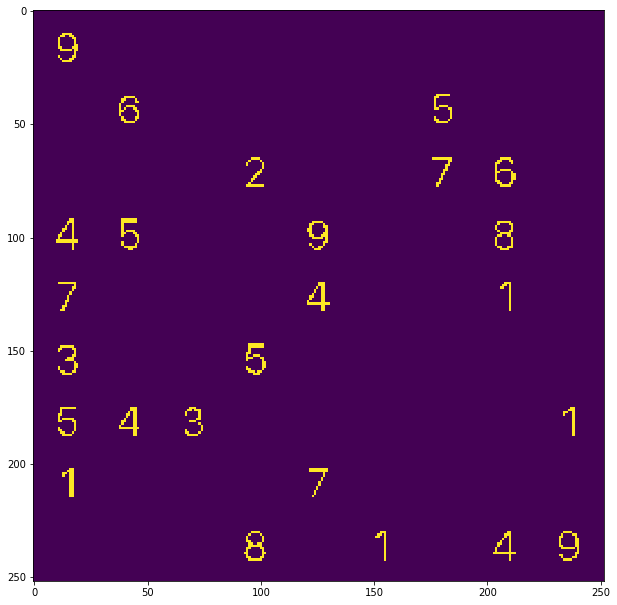

In [117]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(foo)
plt.show()

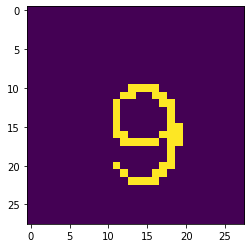

[[0.    0.    0.    0.    0.015 0.    0.033 0.    0.    0.952]]
9


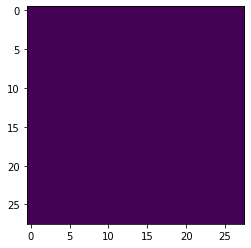

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


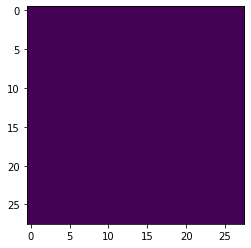

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


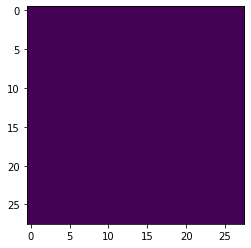

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


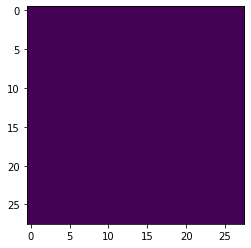

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


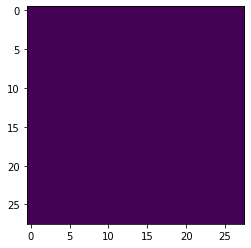

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


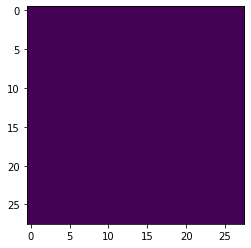

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


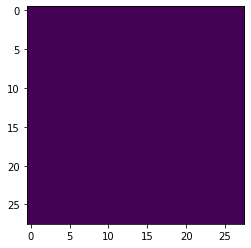

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


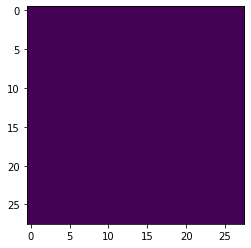

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


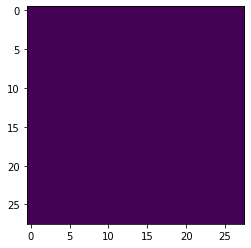

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


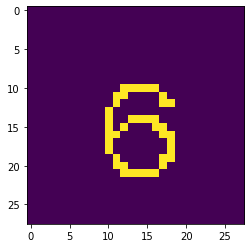

[[0.    0.    0.    0.    0.001 0.    0.994 0.    0.005 0.001]]
6


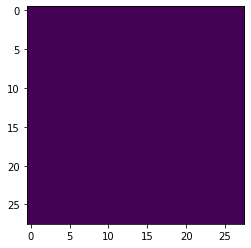

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


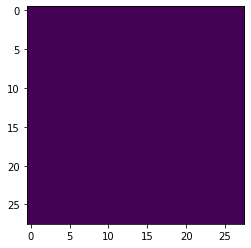

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


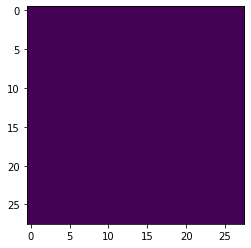

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


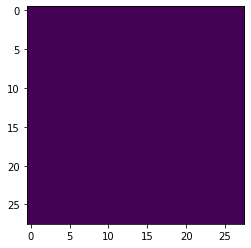

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


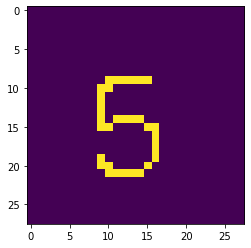

[[0.    0.    0.    0.    0.    0.106 0.006 0.    0.    0.888]]
9


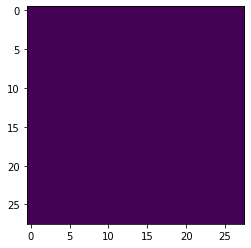

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


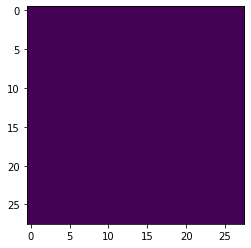

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


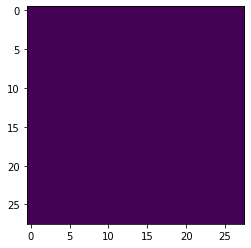

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


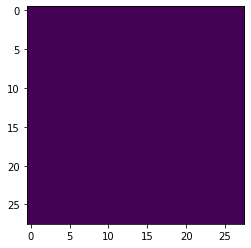

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


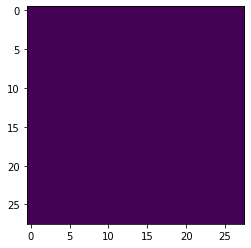

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


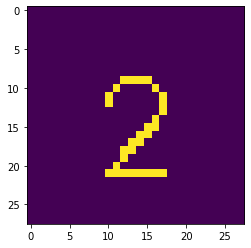

[[0.    0.    0.999 0.    0.    0.    0.    0.    0.    0.   ]]
2


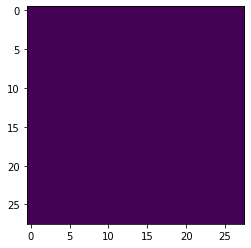

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


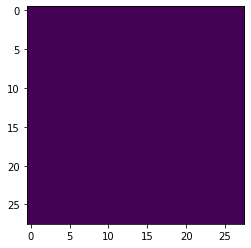

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


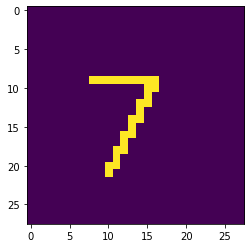

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
7


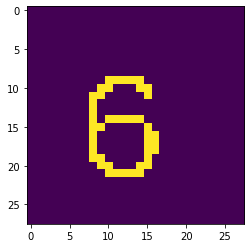

[[0.    0.    0.    0.    0.    0.    0.999 0.    0.    0.   ]]
6


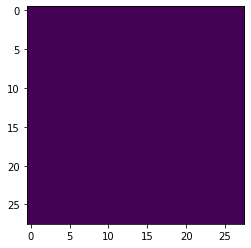

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


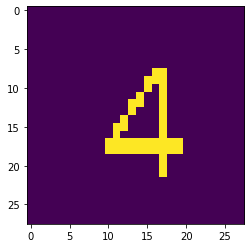

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4


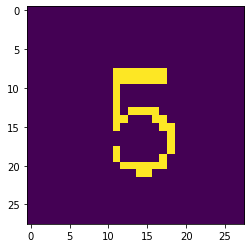

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
5


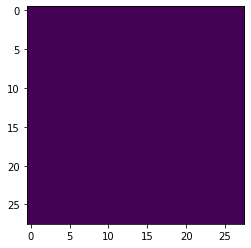

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


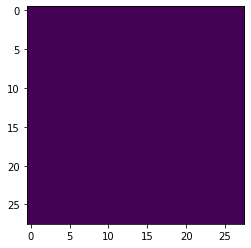

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


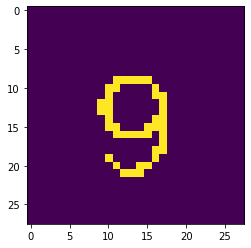

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
9


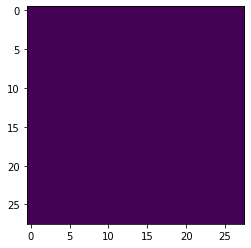

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


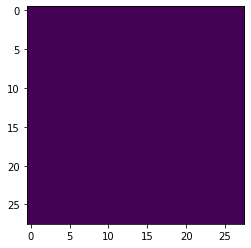

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


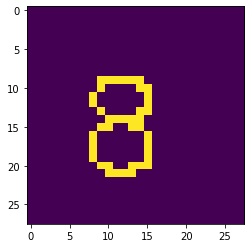

[[0.    0.    0.    0.098 0.011 0.    0.001 0.    0.886 0.004]]
8


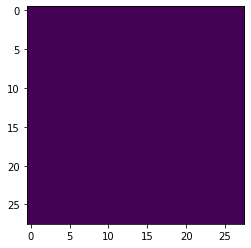

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


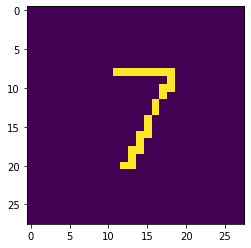

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
7


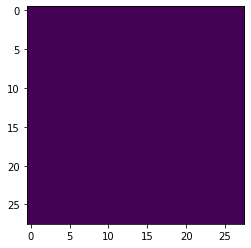

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


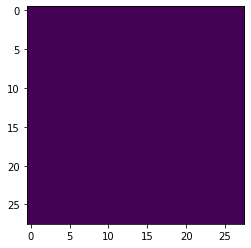

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


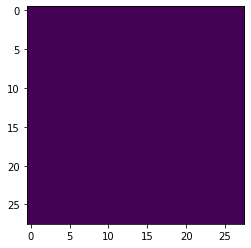

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


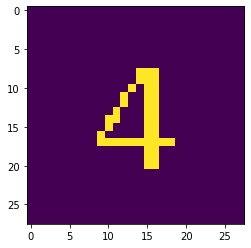

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4


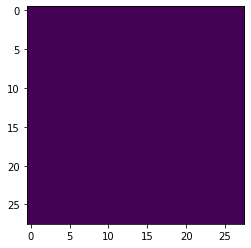

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


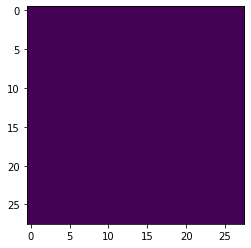

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


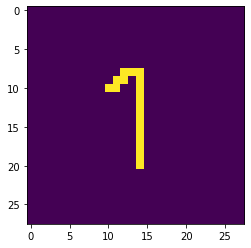

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1


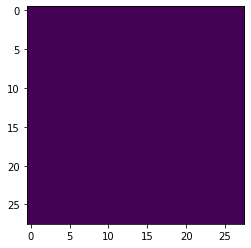

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


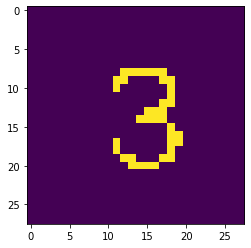

[[0.    0.    0.    0.999 0.    0.    0.    0.    0.    0.001]]
3


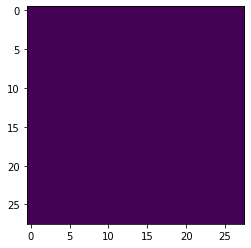

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


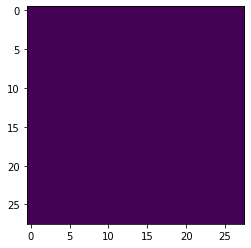

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


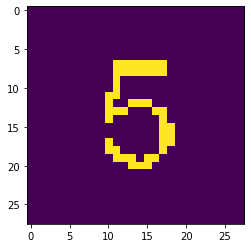

[[0.    0.    0.    0.    0.    0.986 0.001 0.    0.012 0.001]]
5


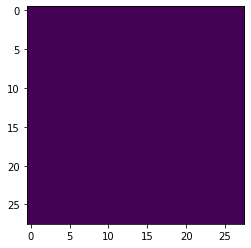

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


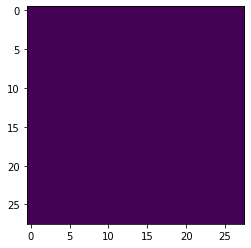

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


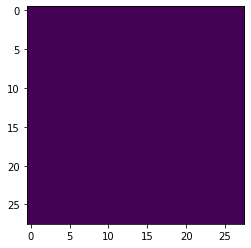

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


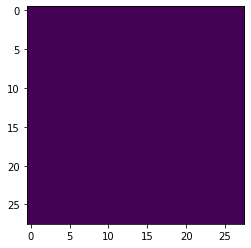

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


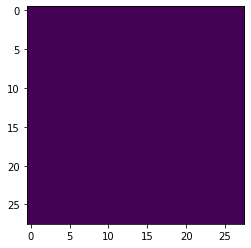

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


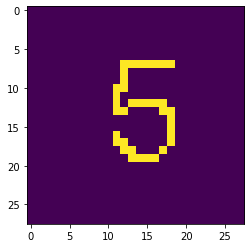

[[0.    0.    0.    0.    0.    0.996 0.003 0.    0.001 0.   ]]
5


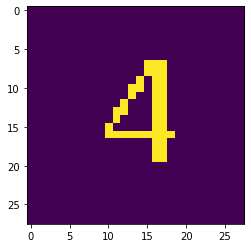

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4


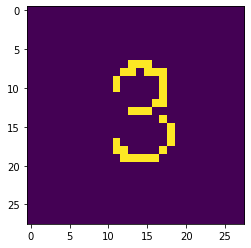

[[0.    0.    0.015 0.984 0.    0.    0.    0.    0.    0.001]]
3


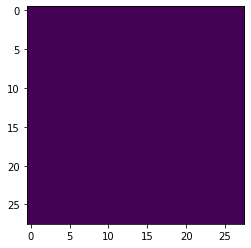

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


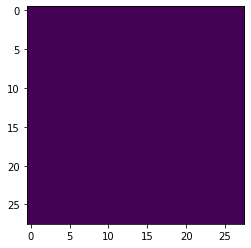

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


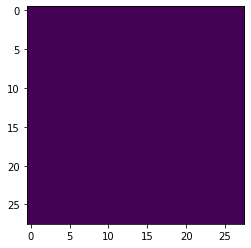

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


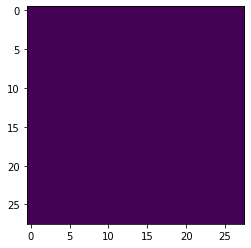

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


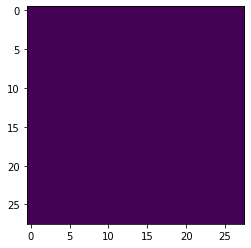

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


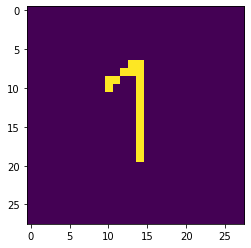

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1


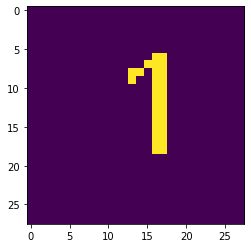

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1


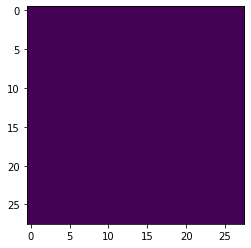

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


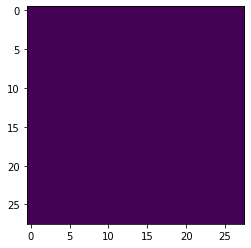

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


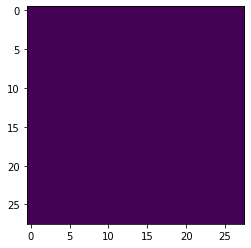

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


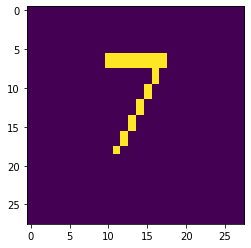

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
7


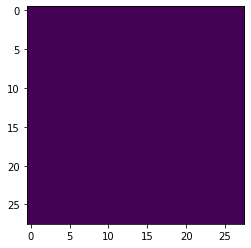

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


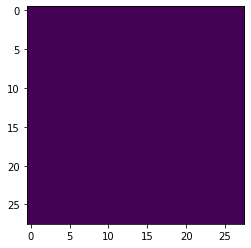

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


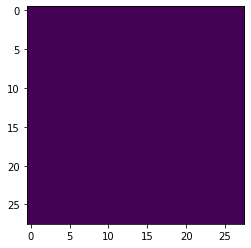

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


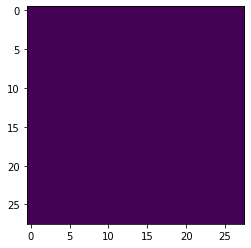

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


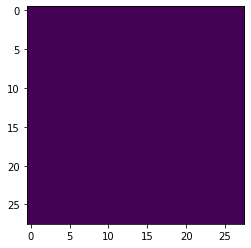

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


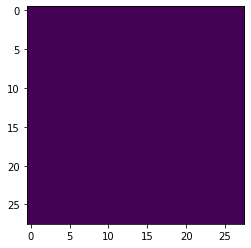

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


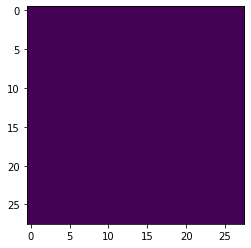

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


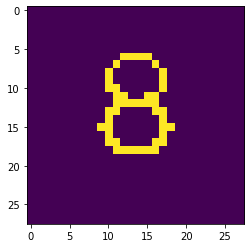

[[0.    0.    0.    0.    0.002 0.    0.254 0.    0.738 0.006]]
8


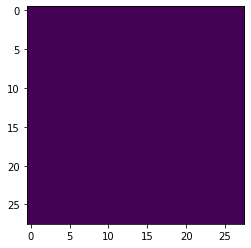

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


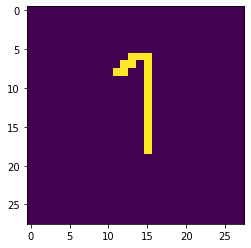

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1


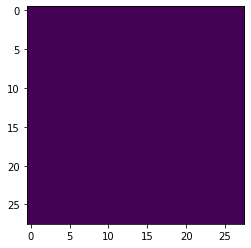

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


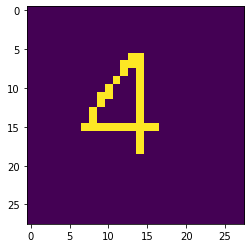

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4


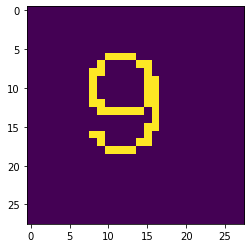

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
9


In [118]:
for f in ['difficulty_hard_p1_copy.png']:
    foo = cv2.imread(f)
#         removing horizontal and vertical grids
    foo = h_v(foo)
#         making both height and width of the same dimension which is 9 * 28
    foo = cv2.resize(foo, (252,252), interpolation = cv2.INTER_LINEAR)
    foo = cv2.cvtColor(foo,cv2.COLOR_BGR2GRAY)
    foo = cv2.threshold(foo, 170, 255, cv2.THRESH_BINARY_INV)[1]
#     plt.imshow(foo)
#     plt.show()

#         store train data
    h,w = foo.shape
    box = 28
    s = 0
    for i in range(0,h,box):
        for j in range(0,w,box):
            foo_r = foo[i:i+box:, j:j+box]
            plt.imshow(foo_r)
            plt.show()

            foo_f = foo_r.reshape((1, foo_r.shape[0], foo_r.shape[1], 1)).astype('float32')
            foo_f = foo_f / 255
            print(np.round(model.predict(foo_f),3))
            print(np.argmax(model.predict(foo_f)))
            if (np.argmax(model.predict(foo_f)) > 0):
                sudoku_array[s] = [np.argmax(model.predict(foo_f))]
            s = s + 1    

In [109]:
sudoku_array

[[9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [6],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [2],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7],
 [6],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [4],
 [5],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [4],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9]